# Stock Prices Prediction Using Machine Learning and Deep Learning Techniques

# Problem Statement
We are going to use Time Series data to analysis of stock price(Apple company dataset).

Time series forecasting is a technique for the prediction of events through a sequence of time. The technique is used across many fields of study, from geology to behavior to economics. The techniques predict future events by analyzing the trends of the past, on the assumption that future trends will hold similar to historical trends.
Time Series forecasting & modeling plays an important role in data analysis. 

Time Series is being widely used in analytics & data science.  Stock Prices Prediction problem is based on  Time Series data.
# Goal
The goal of this project is to make a prediction model which will predict the future stock price based on the given dataset.




# Contents
 1. Problem Statement
 2. Goal
 3. Importing required libraries and Dataset
 4. Feature Scaling
 5. Time Series Split
 7. Prediction Models
  
      1] Long short-term memory (LSTM)
      
      2] Linear Regression
      
      3] k-Nearest Neighbors


 8. Conclusion
 
  



# Importing required libraries and Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/deshm/Desktop/dataml/AAPL.csv')
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [3]:

df1=df.reset_index()['close']

In [4]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

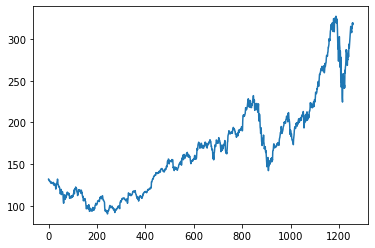

In [5]:

import matplotlib.pyplot as plt

plt.plot(df1)

In [6]:

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [7]:
import numpy as np

# Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:

print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


# Time Series Split

In [10]:

training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:

training_size,test_size

(817, 441)

In [12]:

import numpy

def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]  
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [15]:

print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [16]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Long Short Term Memory (LSTM)

In [17]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 20s 692ms/step - loss: 0.0145 - val_loss: 0.0620
Epoch 2/100
12/12 [==============================] - 5s 452ms/step - loss: 0.0029 - val_loss: 0.0048
Epoch 3/100
12/12 [==============================] - 5s 450ms/step - loss: 9.8662e-04 - val_loss: 0.0050
Epoch 4/100
12/12 [==============================] - 5s 428ms/step - loss: 9.3255e-04 - val_loss: 0.0040
Epoch 5/100
12/12 [==============================] - 5s 421ms/step - loss: 7.8108e-04 - val_loss: 0.0041
Epoch 6/100
12/12 [==============================] - 5s 448ms/step - loss: 7.2089e-04 - val_loss: 0.0045
Epoch 7/100
12/12 [==============================] - 6s 481ms/step - loss: 6.2178e-04 - val_loss: 0.0051
Epoch 8/100
12/12 [==============================] - 6s 488ms/step - loss: 5.9153e-04 - val_loss: 0.0046
Epoch 9/100
12/12 [==============================] - 5s 454ms/step - loss: 5.7509e-04 - val_loss: 0.0040
Epoch 10/100
12/12 [==============================] - 5s 454ms

In [21]:

import tensorflow as tf

In [22]:

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [23]:
##Transformback
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [24]:


import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.06273405847966

In [25]:
### RMSE
math.sqrt(mean_squared_error(ytest,test_predict))


237.26131289879032

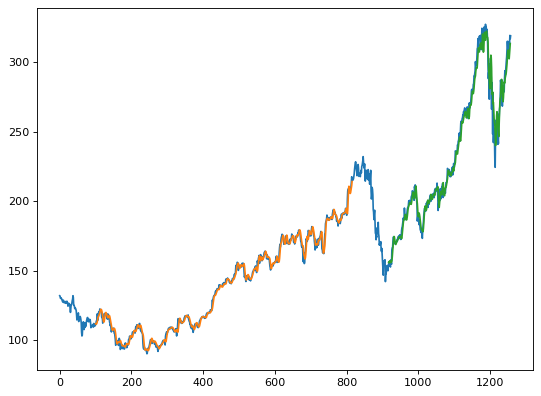

In [26]:

look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Linear Regression

In [27]:
df.columns


Index(['Unnamed: 0', 'symbol', 'date', 'close', 'high', 'low', 'open',
       'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume',
       'divCash', 'splitFactor'],
      dtype='object')

In [28]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [29]:
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['date']
df['date']

date
2015-05-27 00:00:00+00:00   2015-05-27 00:00:00+00:00
2015-05-28 00:00:00+00:00   2015-05-28 00:00:00+00:00
2015-05-29 00:00:00+00:00   2015-05-29 00:00:00+00:00
2015-06-01 00:00:00+00:00   2015-06-01 00:00:00+00:00
2015-06-02 00:00:00+00:00   2015-06-02 00:00:00+00:00
                                       ...           
2020-05-18 00:00:00+00:00   2020-05-18 00:00:00+00:00
2020-05-19 00:00:00+00:00   2020-05-19 00:00:00+00:00
2020-05-20 00:00:00+00:00   2020-05-20 00:00:00+00:00
2020-05-21 00:00:00+00:00   2020-05-21 00:00:00+00:00
2020-05-22 00:00:00+00:00   2020-05-22 00:00:00+00:00
Name: date, Length: 1258, dtype: datetime64[ns, UTC]

In [30]:
df.shape

(1258, 15)

In [31]:
df.columns


Index(['Unnamed: 0', 'symbol', 'date', 'close', 'high', 'low', 'open',
       'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume',
       'divCash', 'splitFactor'],
      dtype='object')

In [32]:

df.drop(['adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume',
       'divCash', 'splitFactor','Unnamed: 0','symbol'], axis = 1,inplace=True)
df.head()

,date,close,high,low,open,volume
date,,,,,,
2015-05-27 00:00:00+00:00,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246
2015-05-28 00:00:00+00:00,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309
2015-05-29 00:00:00+00:00,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452
2015-06-01 00:00:00+00:00,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797
2015-06-02 00:00:00+00:00,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627


In [33]:

df.head()


,date,close,high,low,open,volume
date,,,,,,
2015-05-27 00:00:00+00:00,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246
2015-05-28 00:00:00+00:00,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309
2015-05-29 00:00:00+00:00,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452
2015-06-01 00:00:00+00:00,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797
2015-06-02 00:00:00+00:00,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627


In [34]:
df.isnull().sum()

date      0
close     0
high      0
low       0
open      0
volume    0
dtype: int64

<AxesSubplot:ylabel='date'>

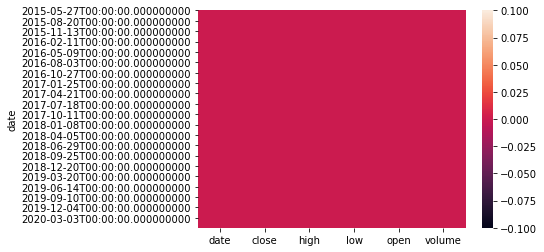

In [35]:
import seaborn as sns
sns.heatmap(df.isnull())

In [36]:
data = df.sort_index(ascending=True, axis=0)

data.shape

(1258, 6)

In [37]:
df.head()

,date,close,high,low,open,volume
date,,,,,,
2015-05-27 00:00:00+00:00,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246
2015-05-28 00:00:00+00:00,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309
2015-05-29 00:00:00+00:00,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452
2015-06-01 00:00:00+00:00,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797
2015-06-02 00:00:00+00:00,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627


In [38]:
df.tail()

,date,close,high,low,open,volume
date,,,,,,
2020-05-18 00:00:00+00:00,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125
2020-05-19 00:00:00+00:00,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385
2020-05-20 00:00:00+00:00,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215
2020-05-21 00:00:00+00:00,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211
2020-05-22 00:00:00+00:00,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754


In [55]:
df.columns

Index(['date', 'close', 'high', 'low', 'open', 'volume'], dtype='object')

In [56]:
df['date'] = pd.to_numeric(pd.to_datetime(df['date']))

df['date']

date
2015-05-27 00:00:00+00:00    1432684800000000000
2015-05-28 00:00:00+00:00    1432771200000000000
2015-05-29 00:00:00+00:00    1432857600000000000
2015-06-01 00:00:00+00:00    1433116800000000000
2015-06-02 00:00:00+00:00    1433203200000000000
                                    ...         
2020-05-18 00:00:00+00:00    1589760000000000000
2020-05-19 00:00:00+00:00    1589846400000000000
2020-05-20 00:00:00+00:00    1589932800000000000
2020-05-21 00:00:00+00:00    1590019200000000000
2020-05-22 00:00:00+00:00    1590105600000000000
Name: date, Length: 1258, dtype: int64

In [57]:
train = df[:629]
valid = df[629:]


In [58]:
x_train = train.drop(['close', 'high', 'low', 'open', 'volume'], axis=1)
y_train = train['close']

x_valid = valid.drop(['close', 'high', 'low', 'open', 'volume'], axis=1)
y_valid = valid['close']


In [59]:
#linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [60]:
#rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

50.572681068434676

<ipython-input-61-31ea9229cbca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-61-31ea9229cbca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


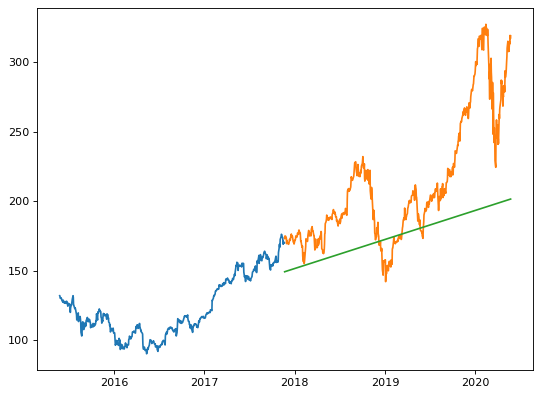

In [61]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = df[629:].index
train.index = df[:629].index
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)


plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])

# k-Nearest Neighbors

In [62]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [63]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)


In [64]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [65]:
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [66]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

94.18608648022987

<ipython-input-67-5043f4d635d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-67-5043f4d635d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


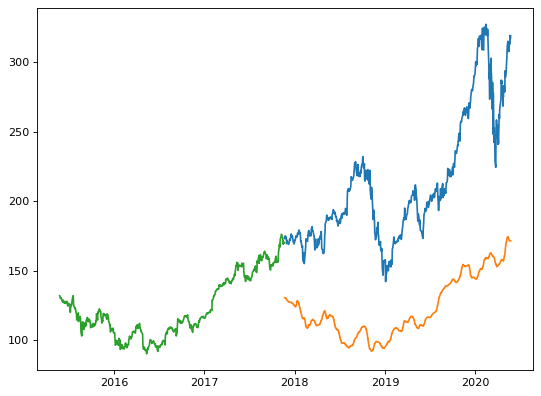

In [67]:
valid['Predictions'] = 0
valid['Predictions'] = preds
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.plot(valid[['close', 'Predictions']])
plt.plot(train['close'])

# Conclusion


In Long Short Term Memory (LSTM) model, we get Root-mean-square error (RMSE) value 143.27

In  Linear Regression model,we get Root-mean-square error (RMSE) value 50.57

In KNN model,we get Root-mean-square error (RMSE) value 94.18.

So the Long short-term memory (LSTM) stand out to be the best model among all those implemented models based on the accuracy scores.